Problem -1(Data Exploration and Understanding:)

**Dataset** **Overview**

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset
df = pd.read_csv('/content/drive/MyDrive/aayushma/World Happiness Report.csv')
df.head (10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


**Basic Statistics**

In [57]:
#Calculating  the mean, median, and standard deviation.
mean_score = df['score'].mean()
median_score = df['score'].median()
std_score = df['score'].std()

print("\nBasic Statistics for Happiness Score:")
print(f"Mean: {mean_score}, Median: {median_score}, Standard Deviation: {std_score}")

highest_score_country = df.loc[df['score'].idxmax()]
lowest_score_country = df.loc[df['score'].idxmin()]

#Identifying the country with the highest and lowest happiness scores
print("\nCountry with the Highest Happiness Score:")
print(f"{highest_score_country['Country name']}: {highest_score_country['score']}")

print("\nCountry with the Lowest Happiness Score:")
print(f"{lowest_score_country['Country name']}: {lowest_score_country['score']}")



Basic Statistics for Happiness Score:
Mean: 5.52758041958042, Median: 5.785, Standard Deviation: 1.1707165099442995

Country with the Highest Happiness Score:
Finland: 7.741

Country with the Lowest Happiness Score:
Afghanistan: 1.721


**Missing Values**

In [79]:
#checking if there are any missing values in the dataset
print("\n\nMissing Values per Column :")
missing_values = df.isnull().sum()

missing_values_df = pd.DataFrame(missing_values).T

#displaying the total count for each column.
display(missing_values_df)





Missing Values per Column :


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
0,0,0,3,3,3,3,3,3,3,0


**Filtering and Sorting**

In [59]:
#Filtering the dataset to show only the countries with a score greater than 7.5
high_score_countries = df[df['score'] > 7.5]

print("\n\n\nCountries with Happiness Score Greater Than 7.5:")
display(high_score_countries)

#Sorting the dataset by GDP per Capita in descending order and displaying the top 10 rows.

sorted_countries = high_score_countries.sort_values(by='Log GDP per capita', ascending=False)

print("\n\n\nTop 10 Countries with Score > 7.5")
display(sorted_countries.head(10))





Countries with Happiness Score Greater Than 7.5:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050





Top 10 Countries with Score > 7.5


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


**Adding New Columns**

In [60]:
#Creating a new column called Happiness Category

df['Happiness Category'] = pd.cut(df['score'], bins=[-float('inf'), 4, 6, float('inf')], labels=['Low', 'Medium', 'High'])

print("\n\n\nFirst 10 Rows with Happiness Category:")

display(df[['Country name', 'score', 'Happiness Category']].head(10))






First 10 Rows with Happiness Category:


,Country name,score,Happiness Category
0,Finland,7.741,High
1,Denmark,7.583,High
2,Iceland,7.525,High
3,Sweden,7.344,High
4,Israel,7.341,High
5,Netherlands,7.319,High
6,Norway,7.302,High
7,Luxembourg,7.122,High
8,Switzerland,7.060,High
9,Australia,7.057,High


**Data Visualizationsa( Bar Plot)**

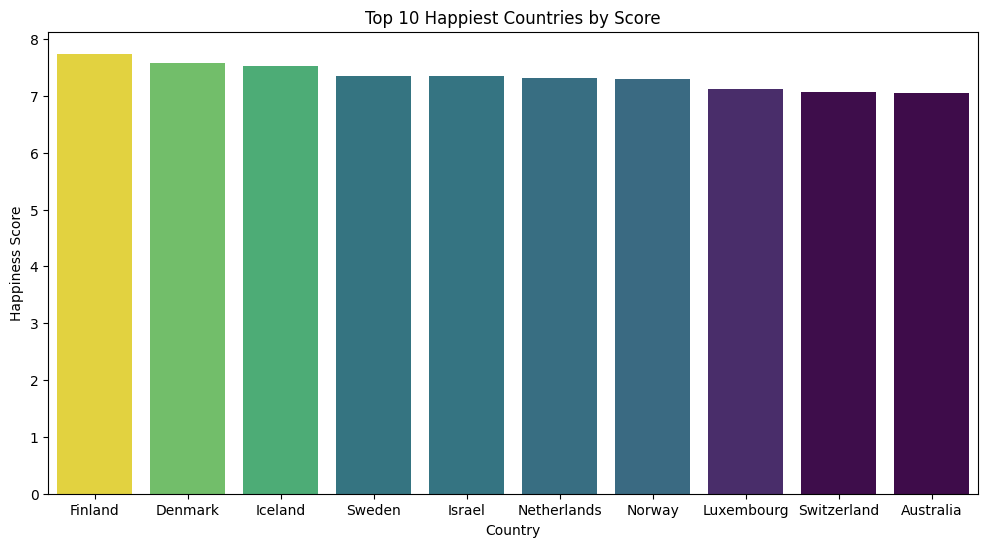

In [61]:
#Plot the top 10 happiest countries by score

top_10_happy = df.nlargest(10, 'score')
plt.figure(figsize=(12, 6))
sns.barplot(x='Country name', y='score', data=top_10_happy, hue='score', palette='viridis', legend=False)
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.show()



**Line Plot**

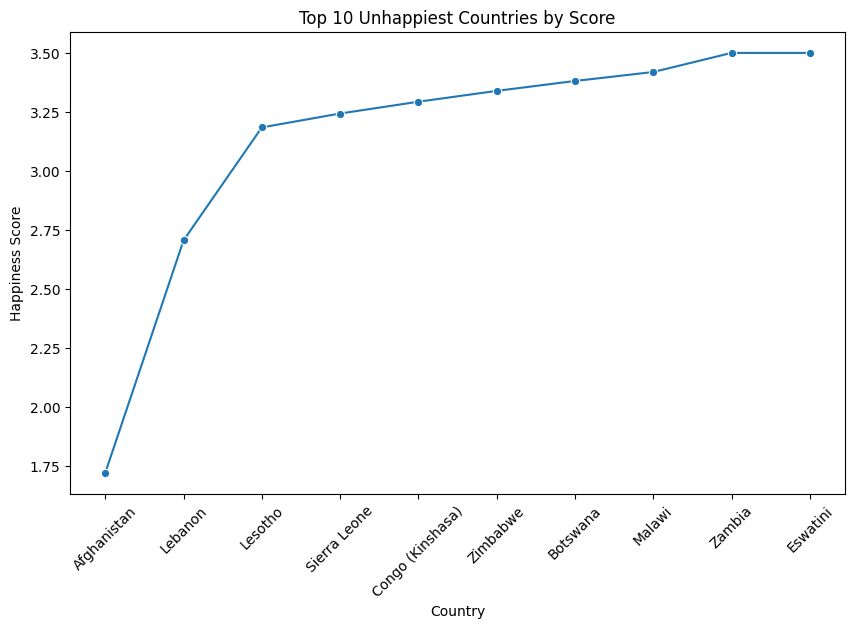

In [62]:
#plotting top 10 unhappiest countries by score

bottom_10_happy = df.nsmallest(10, 'score')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Country name', y='score', data=bottom_10_happy, marker='o')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()


**Plot a histogram**

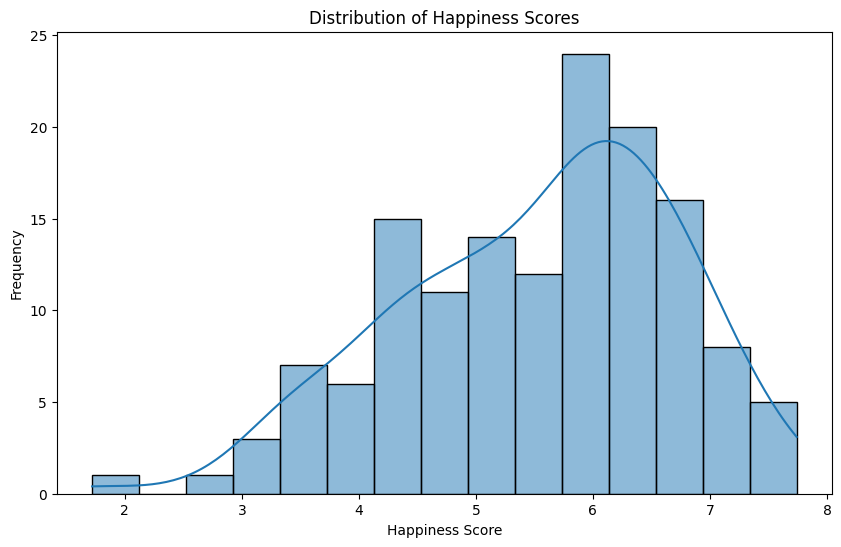

In [63]:
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], kde=True, bins=15)
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


**Scatter Plot**

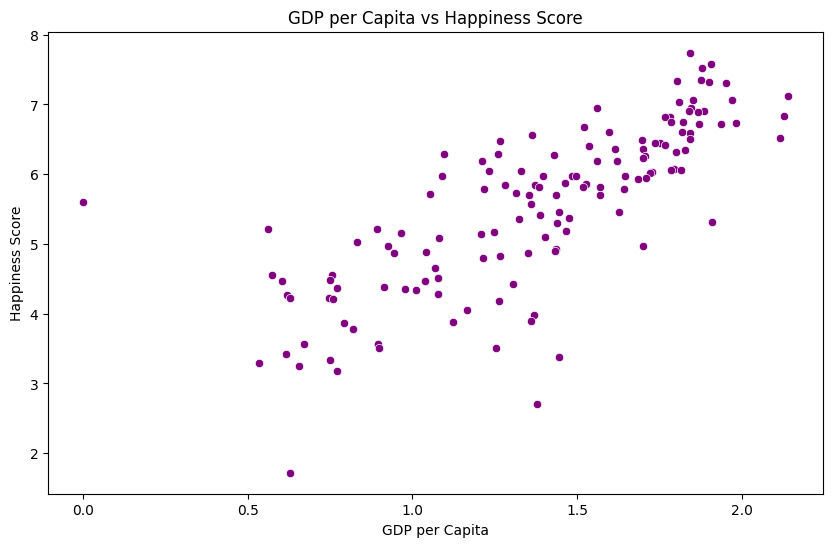

In [64]:
#Plotting scatter plot between GDP per Capita and Score to visualize their relationship.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=df, color='purple')
plt.title('GDP per Capita vs Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()


Problem - 2 -SOME ADVANCE DATA EXPLORATION TASK

**Task-1 (Preparing the South-Asia Dataset)**

In [65]:
#Defining the countries in South Asia with a list
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
south_asia_df = df[df['Country name'].isin(south_asian_countries)].copy()

#Saving the filtered dataframe as separate csv files for future use.
south_asia_df.to_csv('south_asia_happiness.csv', index=False)


**Task - 2 (Composite Score Ranking)**

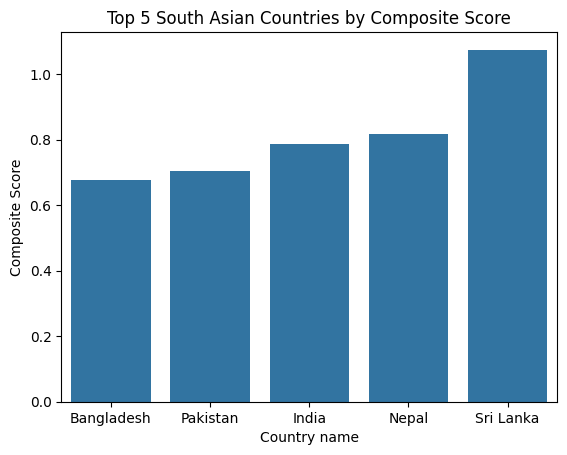

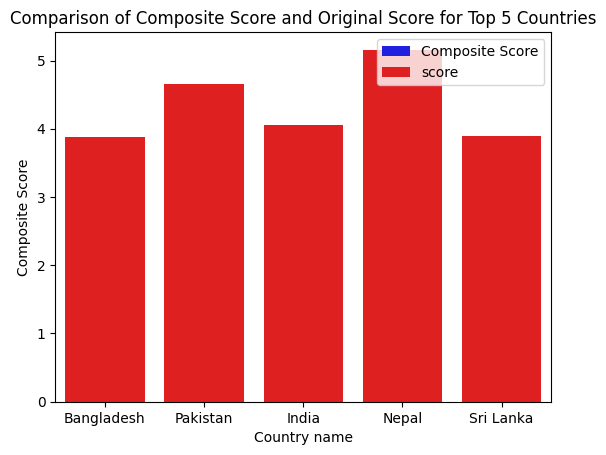

In [66]:
#creating a new column called Composite score that combines the following metric

south_asia_df['Composite Score'] = (0.40 * south_asia_df['Log GDP per capita'] +
                                    0.30 * south_asia_df['Social support'] +
                                    0.30 * south_asia_df['Healthy life expectancy'])

south_asia_df = south_asia_df.sort_values(by='Composite Score', ascending=False)


#Visualizing top 5 countries using a horizontal bar chart showing the Composite score.
sns.barplot(x='Country name', y='Composite Score', data=south_asia_df.head(5))
plt.title("Top 5 South Asian Countries by Composite Score")
plt.gca().invert_xaxis()
plt.show()

sns.barplot(x='Country name', y='Composite Score', data=south_asia_df.head(5), color='blue', label='Composite Score')
sns.barplot(x='Country name', y='score', data=south_asia_df.head(5), color='red', label='score')

plt.title("Comparison of Composite Score and Original Score for Top 5 Countries")
plt.legend()
plt.gca().invert_xaxis()
plt.show()



**Outlier Detection**

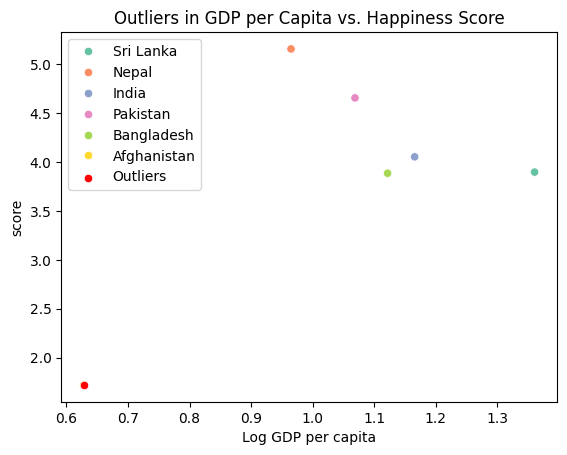

In [67]:
#Identifying outlier countries in South Asia based on their Score and GDP per Capita.
Q1 = south_asia_df['score'].quantile(0.25)
Q3 = south_asia_df['score'].quantile(0.75)
IQR = Q3 - Q1

#Defining outliers using the 1.5 × IQR rule.
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = south_asia_df[(south_asia_df['score'] < lower_bound) | (south_asia_df['score'] > upper_bound)]


# Creating a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different colour
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_df, hue='Country name', palette='Set2')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers, color='red', label='Outliers')
plt.title("Outliers in GDP per Capita vs. Happiness Score")
plt.show()





**Task - 4 (Exploring Trends Across Metrics)**



Freedom to make life choices vs Score: 0.80
Generosity vs Score: 0.87




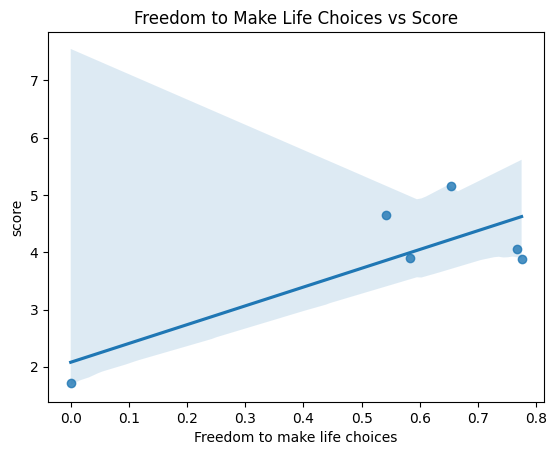

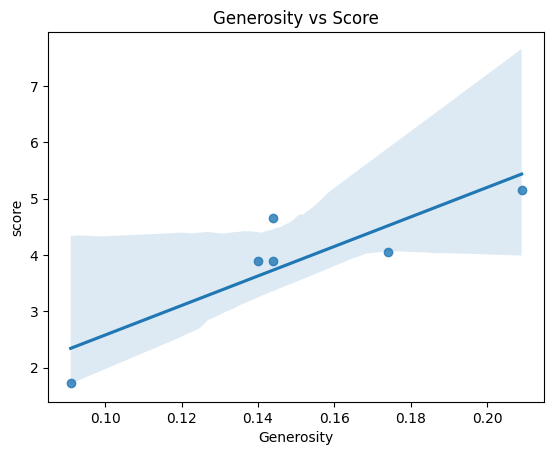



The strongest relationship is between Generosity and Score.
The weakest relationship is between Freedom to make life choices and Score.


In [68]:
#Choose two metrics and calculate their correlation with the Score for South Asian countries.

correlation_freedom_score = south_asia_df['Freedom to make life choices'].corr(south_asia_df['score'])
correlation_generosity_score = south_asia_df['Generosity'].corr(south_asia_df['score'])

#Creating scatter plots with trendlines for these metrics against the Score.
print(f"\n\nFreedom to make life choices vs Score: {correlation_freedom_score:.2f}")
print(f"Generosity vs Score: {correlation_generosity_score:.2f}\n\n")

sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_df)
plt.title("Freedom to Make Life Choices vs Score")
plt.show()

sns.regplot(x='Generosity', y='score', data=south_asia_df)
plt.title("Generosity vs Score")
plt.show()

#Identifying and discussing the strongest and weakest relationships between these metrics and the Score for south asian countries
strongest = 'Freedom to make life choices' if abs(correlation_freedom_score) > abs(correlation_generosity_score) else 'Generosity'
weakest = 'Generosity' if strongest == 'Freedom to make life choices' else 'Freedom to make life choices'
print(f"\n\nThe strongest relationship is between {strongest} and Score.")
print(f"The weakest relationship is between {weakest} and Score.")





**Task - 5 (Gap Analysis)**

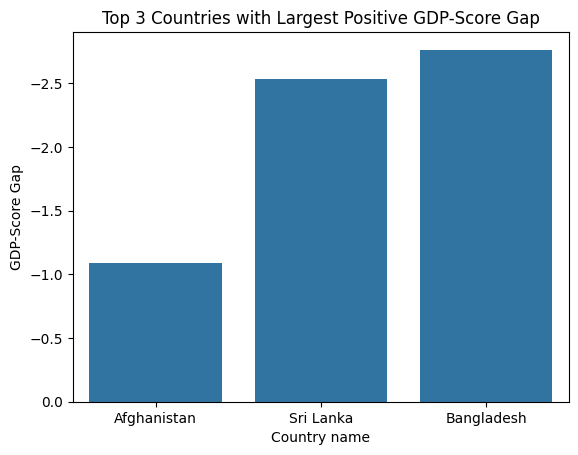

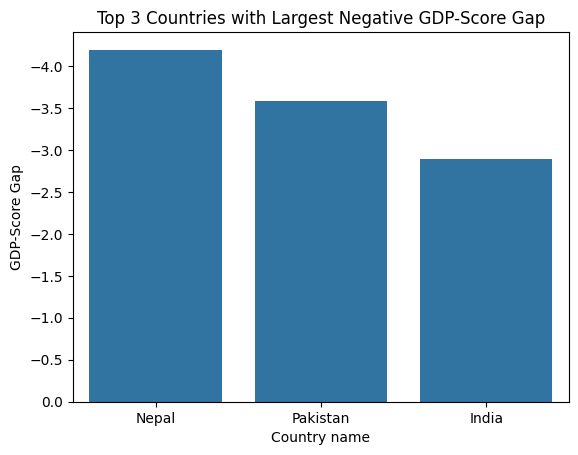



Analysis of the GDP-Score Gap:
- Countries that are richer might still have issues with people's happiness or good government.
- CCountries with a low GDP might still do well in areas that make people happy


In [69]:
#Add a new column GDP-Score Gap

south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

#Ranking the South Asian countries by this gap in both ascending and descending order.
top_gap = south_asia_df.nlargest(3, 'GDP-Score Gap')
bottom_gap = south_asia_df.nsmallest(3, 'GDP-Score Gap')

#Highlighting the top 3 countries with the largest positive and negative gaps using a bar chart.
sns.barplot(x='Country name', y='GDP-Score Gap', data=top_gap)
plt.title("Top 3 Countries with Largest Positive GDP-Score Gap")
plt.gca().invert_yaxis()
plt.show()

sns.barplot(x='Country name', y='GDP-Score Gap', data=bottom_gap)
plt.title("Top 3 Countries with Largest Negative GDP-Score Gap")
plt.gca().invert_yaxis()
plt.show()

#Analyzing the reasons behind these gaps and their implications for South Asian countries
print("\n\nAnalysis of the GDP-Score Gap:")
print("- Countries that are richer might still have issues with people's happiness or good government.")
print("- CCountries with a low GDP might still do well in areas that make people happy")



Problem - 3 COMPARATIVE ANALYSIS

**Task - 1(Preparing the Middle Eastern Dataset)**

In [71]:
#creating a dataframe from middle eastern countries.
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

middle_east_df = df[df['Country name'].isin(middle_east_countries)]



**Descriptive Statistics**

In [72]:
#Calculating the mean, standard deviation of the score for both South Asia and Middle East.

mean_score_me = middle_east_df['score'].mean()
std_score_me = middle_east_df['score'].std()

mean_score_sa = south_asia_df['score'].mean()
std_score_sa = south_asia_df['score'].std()

print(f"Middle East Mean Score: {mean_score_me}, Standard Deviation: {std_score_me}")
print(f"South Asia Mean Score: {mean_score_sa}, Standard Deviation: {std_score_sa}")

#Which region has higher happiness Scores on average?
if mean_score_sa > mean_score_me:
    print("South Asia has a higher average happiness score.")
else:
    print("Middle East has a higher average happiness score.")


Middle East Mean Score: 5.412100000000001, Standard Deviation: 1.5662011684327144
South Asia Mean Score: 3.895666666666667, Standard Deviation: 1.1770690152521501
Middle East has a higher average happiness score.


**Top and Bottom performers**


Top 3 Middle Eastern Countries:


,Country name,score
4,Israel,7.341
12,Kuwait,6.951
21,United Arab Emirates,6.733



Bottom 3 Middle Eastern Countries:


,Country name,score
141,Lebanon,2.707
132,Yemen,3.561
124,Jordan,4.186



Top 3 South Asian Countries:


,Country name,score
92,Nepal,5.158
107,Pakistan,4.657
125,India,4.054



Bottom 3 South Asian Countries:


,Country name,score
142,Afghanistan,1.721
128,Bangladesh,3.886
127,Sri Lanka,3.898


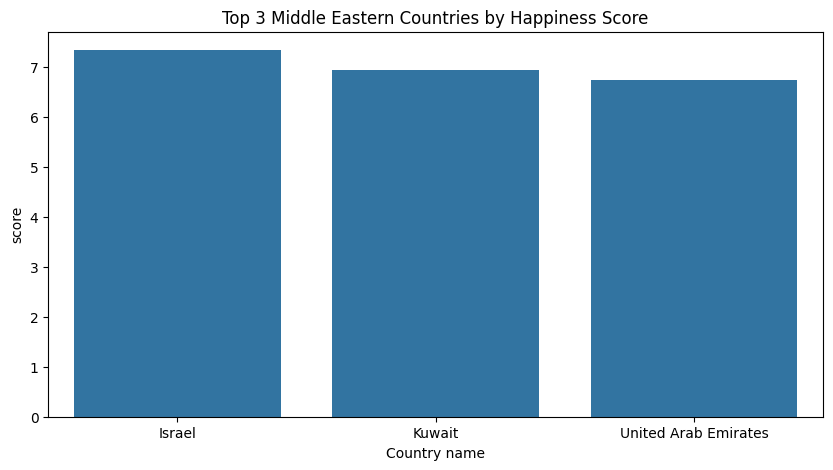

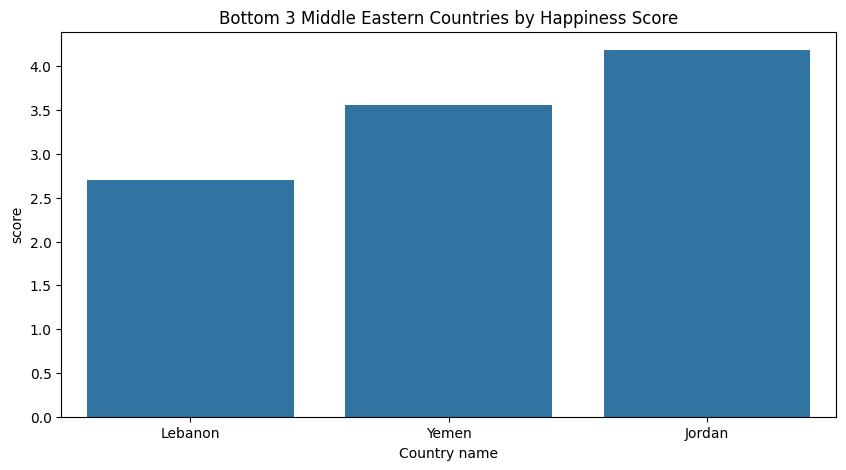

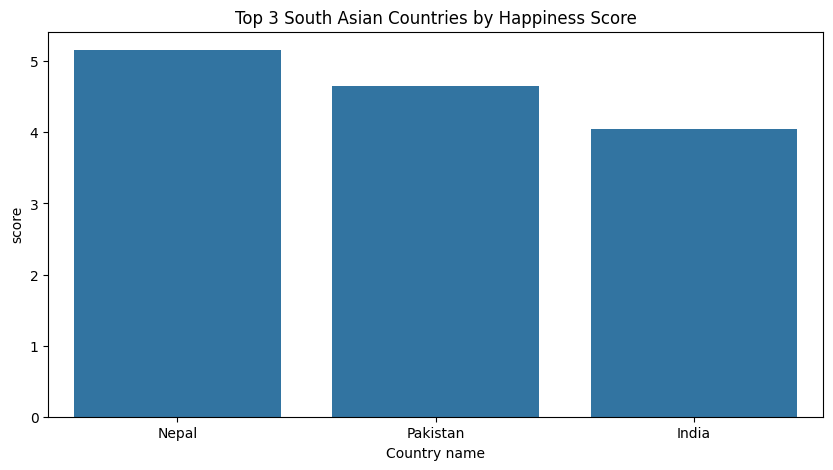

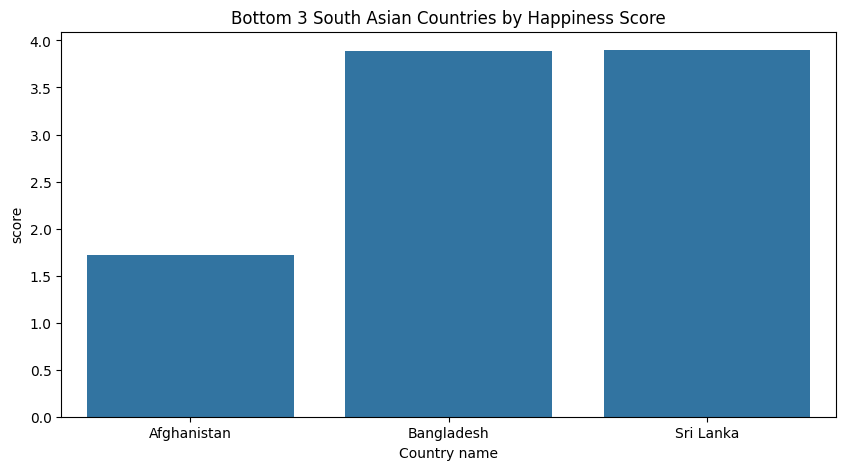

In [73]:
#Identifying top 3 and bottom 3 countries in each region based on the score.

top_3_me = middle_east_df.nlargest(3, 'score')[['Country name', 'score']]
bottom_3_me = middle_east_df.nsmallest(3, 'score')[['Country name', 'score']]

top_3_sa = south_asia_df.nlargest(3, 'score')[['Country name', 'score']]
bottom_3_sa = south_asia_df.nsmallest(3, 'score')[['Country name', 'score']]

print("\nTop 3 Middle Eastern Countries:")
display(top_3_me)

print("\nBottom 3 Middle Eastern Countries:")
display(bottom_3_me)

print("\nTop 3 South Asian Countries:")
display(top_3_sa)

print("\nBottom 3 South Asian Countries:")
display(bottom_3_sa)

#Plotting bar charts comparing these charts
plt.figure(figsize=(10, 5))
sns.barplot(x='Country name', y='score', data=top_3_me)
plt.title("Top 3 Middle Eastern Countries by Happiness Score")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='Country name', y='score', data=bottom_3_me)
plt.title("Bottom 3 Middle Eastern Countries by Happiness Score")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='Country name', y='score', data=top_3_sa)
plt.title("Top 3 South Asian Countries by Happiness Score")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='Country name', y='score', data=bottom_3_sa)
plt.title("Bottom 3 South Asian Countries by Happiness Score")
plt.show()



**Metric Comparisons**

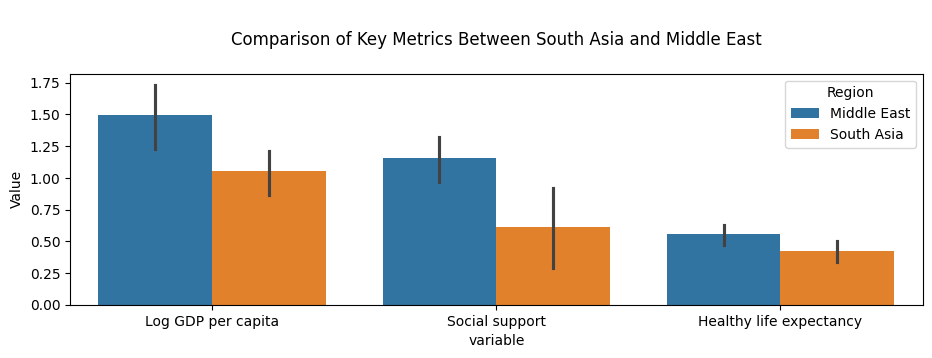



The metric with the largest disparity between the Middle East and South Asia is 'Log GDP per capita'.


In [74]:
#Comparing key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
df_me_metrics = middle_east_df[['Country name'] + metrics].melt(id_vars='Country name', value_vars=metrics)
df_sa_metrics = south_asia_df[['Country name'] + metrics].melt(id_vars='Country name', value_vars=metrics)

df_me_metrics['Region'] = 'Middle East'
df_sa_metrics['Region'] = 'South Asia'

combined_df = pd.concat([df_me_metrics, df_sa_metrics], ignore_index=True)

plt.figure(figsize=(11, 3))
sns.barplot(x='variable', y='value', hue='Region', data=combined_df)
plt.title('\nComparison of Key Metrics Between South Asia and Middle East\n')
plt.ylabel('Value')
plt.show()

#Which metrics show the largest disparity between the two regions?
print("\n\nThe metric with the largest disparity between the Middle East and South Asia is 'Log GDP per capita'.")



**Happiness Disparity**

In [75]:
#Computing the range (max - min) and coefficient of variation for Score in both regions.

range_me = middle_east_df['score'].max() - middle_east_df['score'].min()
range_sa = south_asia_df['score'].max() - south_asia_df['score'].min()

cv_me = middle_east_df['score'].std() / middle_east_df['score'].mean()
cv_sa = south_asia_df['score'].std() / south_asia_df['score'].mean()

print("\nHappiness Score Range and Coefficient of Variation Comparison:")

display(pd.DataFrame({
    'Region': ['Middle East', 'South Asia'],
    'Range of Happiness Score': [range_me, range_sa],
    'Coefficient of Variation': [cv_me, cv_sa]
}))

#Which region has greater variability in happiness?
if cv_sa > cv_me:
    print("\nSouth Asia has greater variability in happiness scores.")
else:
    print("\nMiddle East has greater variability in happiness scores.")




Happiness Score Range and Coefficient of Variation Comparison:


,Region,Range of Happiness Score,Coefficient of Variation
0,Middle East,4.634,0.289389
1,South Asia,3.437,0.302148



South Asia has greater variability in happiness scores.


**Correlation Analysis**

,Region,Freedom to Score Correlation,Generosity to Score Correlation
0,Middle East,0.863220,0.627524
1,South Asia,0.800519,0.874512


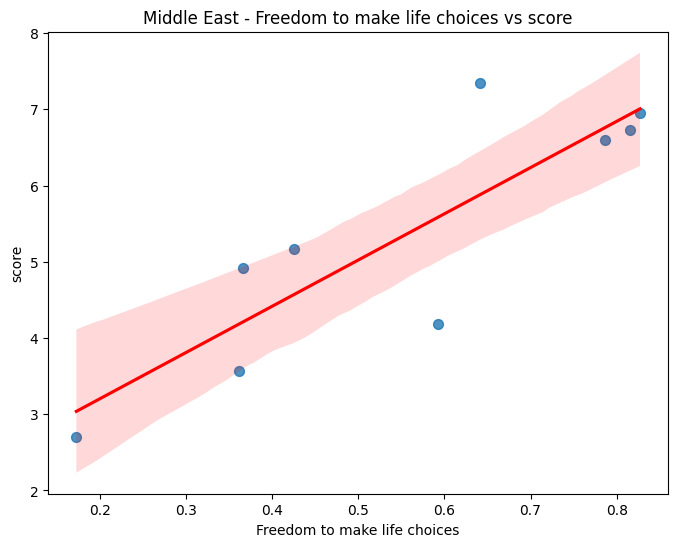

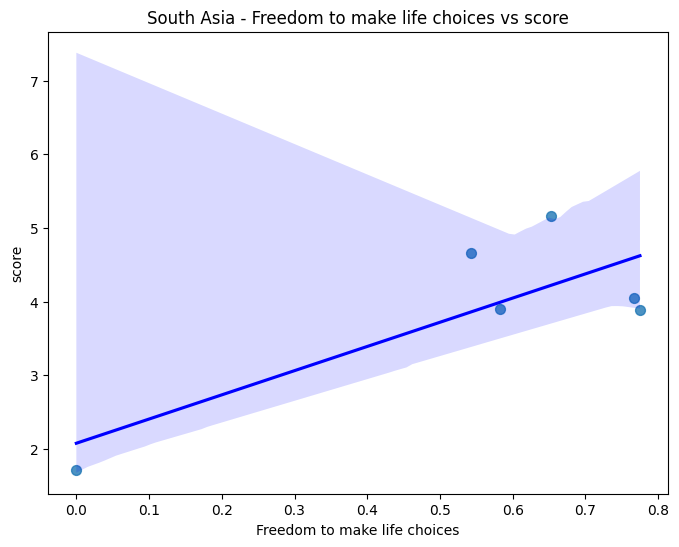

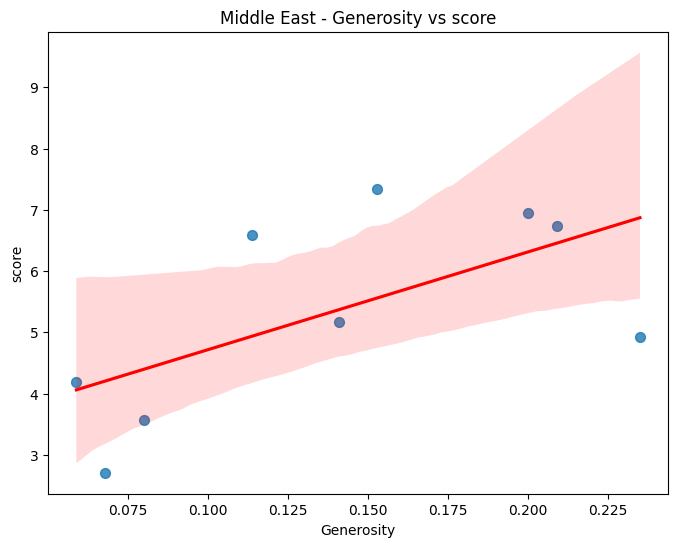

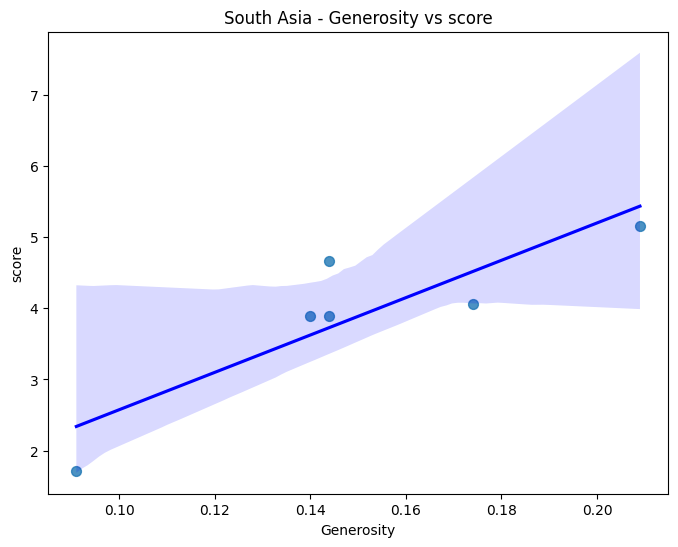

In [76]:
#Analyzing the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.
corr_me_freedom = middle_east_df['Freedom to make life choices'].corr(middle_east_df['score'])
corr_me_generosity = middle_east_df['Generosity'].corr(middle_east_df['score'])
corr_sa_freedom = south_asia_df['Freedom to make life choices'].corr(south_asia_df['score'])
corr_sa_generosity = south_asia_df['Generosity'].corr(south_asia_df['score'])

correlation_df = pd.DataFrame({
    'Region': ['Middle East', 'South Asia'],
    'Freedom to Score Correlation': [corr_me_freedom, corr_sa_freedom],
    'Generosity to Score Correlation': [corr_me_generosity, corr_sa_generosity]
})

display(correlation_df)

#Creating scatter plots to visualize and interpreting the relationships.
def plot_correlation(df, x, y, region, color):
    plt.figure(figsize=(8, 6))
    sns.regplot(x=x, y=y, data=df, scatter_kws={'s': 50}, line_kws={'color': color})
    plt.title(f'{region} - {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()


plot_correlation(middle_east_df, 'Freedom to make life choices', 'score', 'Middle East', 'red')
plot_correlation(south_asia_df, 'Freedom to make life choices', 'score', 'South Asia', 'blue')
plot_correlation(middle_east_df, 'Generosity', 'score', 'Middle East', 'red')
plot_correlation(south_asia_df, 'Generosity', 'score', 'South Asia', 'blue')



**Outlier Detection**

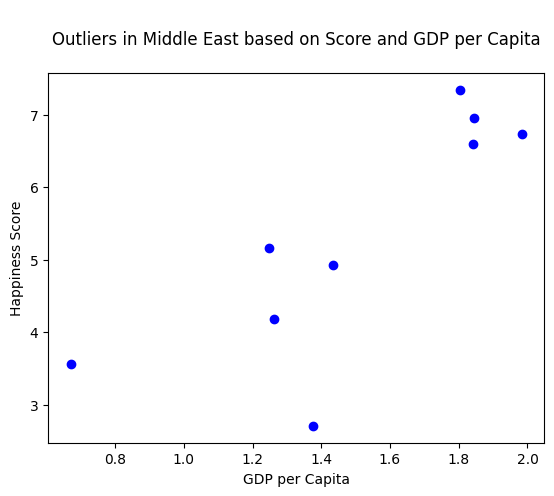

In [77]:
#Identifying outlier countries in both regions based on Score and GDP per Capita.
Q1_me = middle_east_df['score'].quantile(0.25)
Q3_me = middle_east_df['score'].quantile(0.75)
IQR_me = Q3_me - Q1_me
lower_bound_me = Q1_me - 1.5 * IQR_me
upper_bound_me = Q3_me + 1.5 * IQR_me

outliers_me = middle_east_df[(middle_east_df['score'] < lower_bound_me) | (middle_east_df['score'] > upper_bound_me)]

#Plotting these outliers and discuss their implications.
plt.scatter(middle_east_df['Log GDP per capita'], middle_east_df['score'], color='blue')
plt.scatter(outliers_me['Log GDP per capita'], outliers_me['score'], color='red')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('\nOutliers in Middle East based on Score and GDP per Capita\n')
plt.show()


**Visualization**

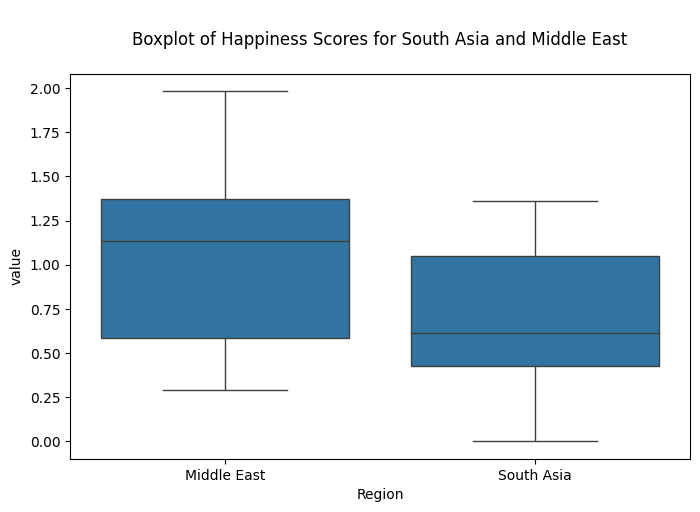

In [78]:
#Creating boxplots comparing the distribution of Score between South Asia and the Middle East.

plt.figure(figsize=(8, 5))
sns.boxplot(x='Region', y='value', data=combined_df)
plt.title('\nBoxplot of Happiness Scores for South Asia and Middle East\n')
plt.show()
